Load .csv (or .xlsx) provided by "Workshops" chairs with data containing information from the SQL Database for this years EYH participants

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# Sorting Hat 2024 - Sort EYH Participants into workshops based on students preferences and students partner assignments
# Russell W. Burgett
# 3/18/2024

# import global packages
import os
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

# import local packages
os.chdir("/Users/russthebuss/Documents/GitHub/EYH/EYHWorkshopSorting/sortingFunctions")
from assignPartners import *
from assignWorkshops import *
from cleanDataframe import *

# import warnings
# warnings.simplefilter(action="ignore", category=FutureWarning)

# rng = np.random.default_rng()

# Set the working directory
os.chdir("/Users/russthebuss/Documents/GitHub/EYH/EYHWorkshopSorting/workshop_preferences")

file = "Updated_3_21_workshop_preferences_EYH_2024"

df = pd.read_csv(file + ".csv")

Define Individual Workshops capacities (varies year-to-year)

In [2]:
### Workshop Capacties ###
seventh_eighth_capacities = [
    10,
    13,
    10,
    16,
    13,
    25,
    20,
    12,
    16,
    20,
    15,
    10,
    25,
    12,
    25,
    25,
    11,
    22,
    15,
    11,
    15,
    25,
]
ninth_tenth_capacities = [
    10,
    12,
    12,
    10,
    25,
    16,
    10,
    11,
    10,
]

# Generate workshops list based on capacities
seventh_eight_workshops = [[] for _ in range(len(seventh_eighth_capacities))]
ninth_tenth_workshops = [[] for _ in range(len(ninth_tenth_capacities))]

Now comes the "meat and potatoes" of the workshop sorting code. First, let's note some things about the contents of the .csv file: 
 - values for ws_1 -> ws9_5 indicate a participants pefered workshops to attend the the number corresponding to that workshops ID #. 
 - If a participants value for one of those columns is ZERO (0), then they don't care what workshop they attend (i.e. no perferences). 
 - The column ('special_workshop_preference') is only applicable for participants in grades 9 and 10.
 - 'special' implies they want to attend 9th-10th workshops only
 - 'ordinary' implies they prefer to attend a 7th-8th grade workshop
 - 'no_perference' implies they don't care if they attend 7th-8th grade workshops or 9th-10th grade workshops

With that information in mind, the algorithm is pretty straightforward as follows, using the .csv file provided:

 - for each subgroup, use the 'special_workshop_preference' column to decide if they will be assigned 7th-8th grade workshops and/ or 9th-10th grade workshops (depending on capacities and fullness).
   - sort the particpants into three groups: no partner, one partner, two partners
   - sort each of the three groups into two more (depending on the participants grade)
   - create one 'subgroup' for each group of participants (i.e. three 'partners' become one active participant to ensure all get sent to the same workshops)
   
 - [shuffle each subgroup for before assiggning workshops (avoid biasing?)]

 - starting with the older participants who have partners, assign their workshops (TWO (2) Total for day of EYH)
    - continue until all older participants have been sorted
 - continue on to the remianing particpants and place into workshops until all participants have been assigned (THREE (3) Total for younger participants for day of EYH).
 - save results into a .csv with the following columns:
 ['girl_id', 'grade', 'partner_id', 'partner_id_2', 'ws_1', 'ws_2', 'ws_3']

In [3]:
preferences = get_special_workshop_preferences(df)
mid_ind, mid_one, mid_two, high_ind, high_one, high_two = sort_partners(df, preferences)
unique_mid_ind, unique_mid_one, unique_mid_two, unique_high_ind, unique_high_one, unique_high_two = generate_unique_subbroups(mid_ind, mid_one, mid_two, high_ind, high_one, high_two)

In [4]:
print(unique_high_one)
# dumb fix, but okay for now
# just remove [3, 268, 269] from unique_high_one (since double counted)
unique_high_one = unique_high_one[0:2] + unique_high_one[3:]
unique_high_one

[[3, 256, 257], [3, 461, 507], [2, 268, 269], [3, 455, 460], [3, 296, 302], [3, 436, 439], [3, 87, 114], [1, 260, 262], [3, 438, 442], [1, 278, 295]]


[[3, 256, 257],
 [3, 461, 507],
 [3, 455, 460],
 [3, 296, 302],
 [3, 436, 439],
 [3, 87, 114],
 [1, 260, 262],
 [3, 438, 442],
 [1, 278, 295]]

### First Round of Workshops (9th/10th and 7th/8th)

In [5]:
first_round_seventh_eight_workshops, first_round_ninth_tenth_workshops, updated_seventh_eighth_capacities = assign_9th_10th_workshops(df, ninth_tenth_workshops, ninth_tenth_capacities, seventh_eight_workshops, seventh_eighth_capacities, unique_high_two, unique_high_one, unique_high_ind)

first_round_seventh_eight_workshops = assign_7th_8th_workshops(df, first_round_seventh_eight_workshops, seventh_eight_workshops, seventh_eight_workshops, updated_seventh_eighth_capacities, unique_mid_two, unique_mid_one, unique_mid_ind, third_round = False)

### Second Round of Workshops (9th/10th and 7th/8th)

In [8]:
# NEED A WAY TO MAKE SURE PARTICPANTS ARE NOT ASSIGNED TO THE SAME WORKSHOP IN THE 2ND ROUND

In [9]:
### RESET ###

seventh_eight_workshops = [[] for _ in range(len(seventh_eighth_capacities))]

### Workshop Capacties ###
seventh_eighth_capacities = [
    10,
    13,
    10,
    16,
    13,
    25,
    20,
    12,
    16,
    20,
    15,
    10,
    25,
    12,
    25,
    25,
    11,
    22,
    15,
    11,
    15,
    25,
]
ninth_tenth_capacities = [
    10,
    12,
    12,
    10,
    25,
    16,
    10,
    11,
    10,
]

In [10]:
second_round_seventh_eight_workshops, second_round_ninth_tenth_workshops, updated_seventh_eighth_capacities = assign_9th_10th_workshops(df, first_round_ninth_tenth_workshops, ninth_tenth_capacities, first_round_seventh_eight_workshops, seventh_eighth_capacities, unique_high_two, unique_high_one, unique_high_ind)

second_round_seventh_eight_workshops = assign_7th_8th_workshops(df, second_round_seventh_eight_workshops, first_round_seventh_eight_workshops, seventh_eight_workshops, updated_seventh_eighth_capacities, unique_mid_two, unique_mid_one, unique_mid_ind, third_round = False)

### Third Round of Workshops (7th/8th Only)

In [11]:
# create new dataframe with all 9th/10th students removed
mid_df = create_mid_only_dataframe(df, first_round_seventh_eight_workshops, second_round_seventh_eight_workshops)

In [12]:
mid_df.to_csv("mid_df.csv")

In [13]:
### RESET ###

### Workshop Capacties ###
seventh_eighth_capacities = [
    10,
    13,
    10,
    16,
    13,
    25,
    20,
    12,
    16,
    20,
    15,
    10,
    25,
    12,
    25,
    25,
    11,
    22,
    15,
    11,
    15,
    25,
]
ninth_tenth_capacities = [
    10,
    12,
    12,
    10,
    25,
    16,
    10,
    11,
    10,
]

In [14]:
# # REASSIGN UNIQUE MID GROUPS AFTER CREATING NEW MID_DF
# # only need to sort based on the number of partners, don't need to sort into high and mid
# # then rerun 
preferences = get_special_workshop_preferences(mid_df)
ind, one, two = sort_partners_no_grades(mid_df, preferences)
unique_ind, unique_one, unique_two = generate_unique_subbroups_no_grades(ind, one, two)

In [15]:
# assign third round workshops for 7th/8th graders (do 9th/10th graders also to account for 'ordinary' preferences)
# don't forget to check if the participants are in the same workshop as the previous rounds (emphasis on ROUNDS -> meaning 1st and 2nd)

third_round_seventh_eight_workshops = assign_7th_8th_workshops(mid_df, [], first_round_seventh_eight_workshops, second_round_seventh_eight_workshops, seventh_eighth_capacities, unique_two, unique_one, unique_ind, third_round = True)

In [16]:
# reload the original dataframe
df = pd.read_csv(file + ".csv")

In [17]:
workshop_assignments_df = create_workshop_assignments_dataframe(df, first_round_seventh_eight_workshops, first_round_ninth_tenth_workshops, second_round_seventh_eight_workshops, second_round_ninth_tenth_workshops, third_round_seventh_eight_workshops)

In [18]:
# 3/23/2024 :: 10:45 PM
# BUG: need to make sure that the same participants are not assigned to the same workshop in the 2nd and 3rd rounds
#      currently, function is looking at same workshop index for rounds 1 AND 2, should be looking at same workshop index for rounds 1 OR 2 (?)
#      seems to only affect 7th/8th graders with no partners 
#      for some reason, python is returning True, even though item is in list (so should return False) wtf
#      doesn't like using indexing and calling functions when checking for boolean, so just assign to variable and check that
#      fixed (evidently)


# BUG: girl_id = 461 is assigned to three 7th grade workshops and their partner girl_id 507 is only assigned to one workshop??
#      fixed (evidently)

# FEATURE TO ADD: if high schooler (ind or partners) got assigned to two 7th/8th grade workshops, then they should get a third round assignment too (i.e. modify mid_df?)
#                 added AM 3/24/2024

# BUG: girl_id 506 and 507 are no tgetting assigned to second and third round workshops as their partners are? 
#      I guess running the function again will fix this, but need to make sure that the function is working properly (eventually)

# ------------------------ 3/24/2024 ----------------
# BUG: Students with one partner are being split up after the first and second rounds ??? -> no, assignments are okay, just must be an error with how i'm checking the data 
#      and making the assignments data frame -> reran and fixed (?)

# BUG: workshop_assignments_df is not displaying proper 9th/10th workshop numbers
#      fixed -> add 22 to workshop_index to properly number 9th/10th workshops

# BUG: mid_df is includes some 9th/10th graders who were put in 9th/10th workshops in the first and second rounds, should just be if they were put in 7th/8th workshops in the first and second rounds

# BUG: some 7th/8th graders are being assigned to 9th/10th grade workshiops?

# BUG: 9th/10th graders are being put into same workshop in 1st and 2nd rounds (?)

### Above bugs seemed to be fixed by just running the notebook again ###

In [19]:
workshop_assignments_df.to_csv("workshop_assignments_EYH_2024.csv.csv", index = False)

In [20]:
# Small Bug: Some 9th/10th graders have a third workshop listed even though they were assigned to two 9th/10th workshops in the first and second rounds
# clean by removing third workshop assignment for these students
for index in range(len(workshop_assignments_df)):
    workshop_1 = workshop_assignments_df["workshop_1"][index]
    workshop_2 = workshop_assignments_df["workshop_2"][index]
    if workshop_1 > 22 and workshop_2 > 22:
        workshop_assignments_df["workshop_3"][index] = np.nan


In [76]:
workshop_assignments_df.to_csv("workshop_assignments_EYH_2024.csv", index = False) # override previous file

## Plot Results 

- create plots which show the results of each round of workshops assignments via a bar graph

In [69]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)
plt.rcParams['figure.figsize'] = 9, 6

In [70]:
### RESET ###

### Workshop Capacties ###
seventh_eighth_capacities = [
    10,
    13,
    10,
    16,
    13,
    25,
    20,
    12,
    16,
    20,
    15,
    10,
    25,
    12,
    25,
    25,
    11,
    22,
    15,
    11,
    15,
    25,
]
ninth_tenth_capacities = [
    10,
    12,
    12,
    10,
    25,
    16,
    10,
    11,
    10,
]

# Generate workshops list based on capacities
first_round_seventh_eight_workshops_counts = [[] for _ in range(len(seventh_eighth_capacities))]
first_round_ninth_tenth_workshops_counts = [[] for _ in range(len(ninth_tenth_capacities))]

second_round_seventh_eight_workshops_counts = [[] for _ in range(len(seventh_eighth_capacities))]
second_round_ninth_tenth_workshops_counts = [[] for _ in range(len(ninth_tenth_capacities))]

third_round_seventh_eight_workshops_counts = [[] for _ in range(len(seventh_eighth_capacities))]

for student_index in range(len(workshop_assignments_df)):
    workshop_1 = workshop_assignments_df["workshop_1"][student_index].astype(int)
    workshop_2 = workshop_assignments_df["workshop_2"][student_index].astype(int)   

    if workshop_1 <= 22:
        first_round_seventh_eight_workshops_counts[workshop_1 - 1].append(1)
    elif workshop_1 > 22:
        first_round_ninth_tenth_workshops_counts[workshop_1 - 23].append(1)
    if workshop_2 <= 22:
        second_round_seventh_eight_workshops_counts[workshop_2 - 1].append(1)
    elif workshop_2 > 22:
        second_round_ninth_tenth_workshops_counts[workshop_2 - 23].append(1)
        
    if pd.notna(workshop_assignments_df["workshop_3"][student_index]):
        workshop_3 = workshop_assignments_df["workshop_3"][student_index].astype(int)
        third_round_seventh_eight_workshops_counts[workshop_3 - 1].append(1) 

# Sum lists to get workshop counts
first_round_seventh_eight_workshops_counts = [sum(workshop) for workshop in first_round_seventh_eight_workshops_counts]
first_round_ninth_tenth_workshops_counts = [sum(workshop) for workshop in first_round_ninth_tenth_workshops_counts]

second_round_seventh_eight_workshops_counts = [sum(workshop) for workshop in second_round_seventh_eight_workshops_counts]
second_round_ninth_tenth_workshops_counts = [sum(workshop) for workshop in second_round_ninth_tenth_workshops_counts]

third_round_seventh_eight_workshops_counts = [sum(workshop) for workshop in third_round_seventh_eight_workshops_counts]


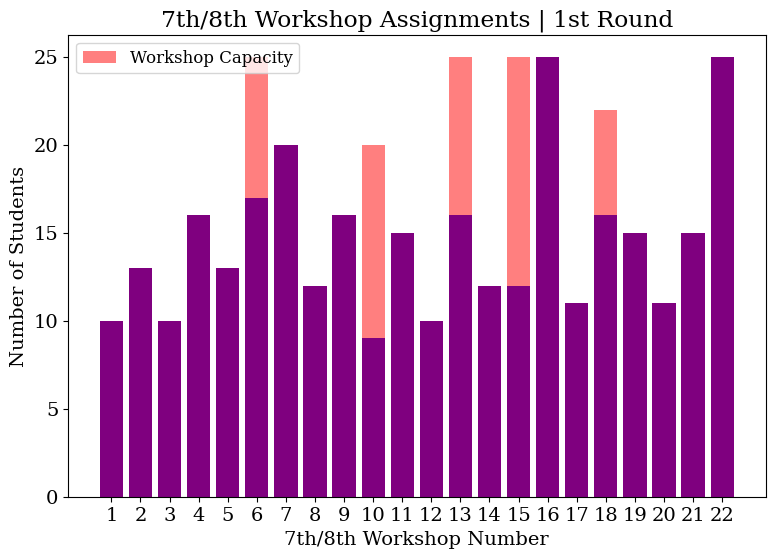

In [71]:
plt.bar(range(len(first_round_seventh_eight_workshops_counts)), first_round_seventh_eight_workshops_counts, color='blue')
plt.bar(range(len(seventh_eighth_capacities)), seventh_eighth_capacities, color='red', alpha = 0.5, label = 'Workshop Capacity')

plt.xticks(range(len(first_round_seventh_eight_workshops_counts)), range(1, len(first_round_seventh_eight_workshops_counts) + 1))
plt.yticks(range(0, 30, 5))

plt.xlabel('7th/8th Workshop Number')
plt.ylabel('Number of Students')

plt.title('7th/8th Workshop Assignments | 1st Round')

plt.legend(fontsize = 12)

plt.savefig("first_round_seventh_eight_workshops.png", dpi = 300)

plt.show()

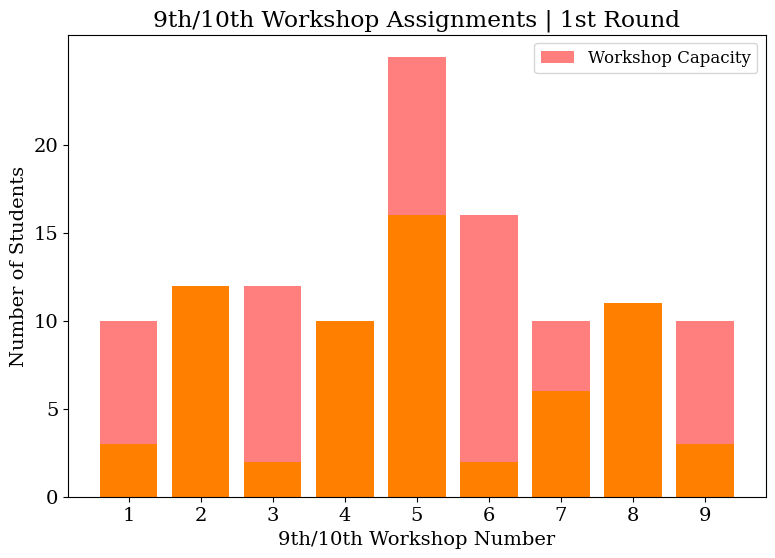

In [72]:
plt.bar(range(len(first_round_ninth_tenth_workshops_counts)), first_round_ninth_tenth_workshops_counts, color='yellow')
plt.bar(range(len(ninth_tenth_capacities)), ninth_tenth_capacities, color='red', alpha = 0.5, label = 'Workshop Capacity')

plt.xticks(range(len(first_round_ninth_tenth_workshops_counts)), range(1, len(first_round_ninth_tenth_workshops_counts) + 1))
plt.yticks(range(0, 25, 5))

plt.xlabel('9th/10th Workshop Number')
plt.ylabel('Number of Students')

plt.title('9th/10th Workshop Assignments | 1st Round')

plt.legend(fontsize = 12)

plt.savefig("first_round_ninth_tenth_workshops.png", dpi = 300)

plt.show()

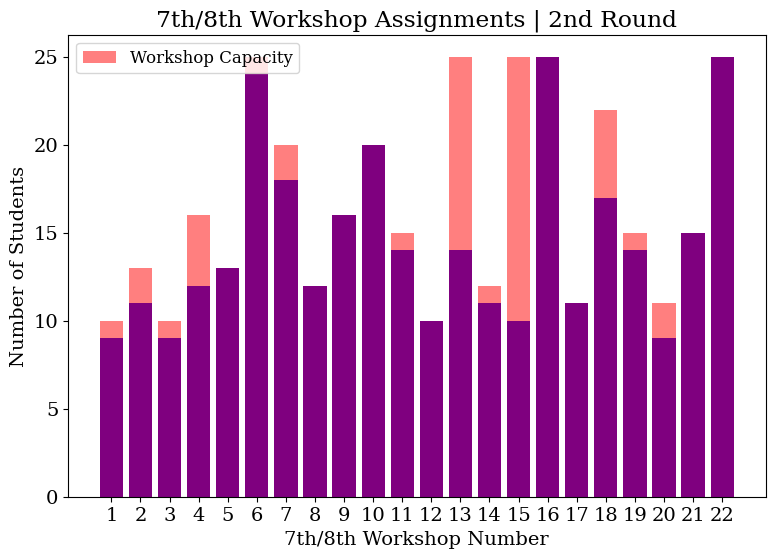

In [73]:
plt.bar(range(len(second_round_seventh_eight_workshops_counts)), second_round_seventh_eight_workshops_counts, color='blue')
plt.bar(range(len(seventh_eighth_capacities)), seventh_eighth_capacities, color='red', alpha = 0.5, label = 'Workshop Capacity')

plt.xticks(range(len(second_round_seventh_eight_workshops_counts)), range(1, len(second_round_seventh_eight_workshops_counts) + 1))
plt.yticks(range(0, 30, 5))

plt.xlabel('7th/8th Workshop Number')
plt.ylabel('Number of Students')

plt.title('7th/8th Workshop Assignments | 2nd Round')

plt.legend(fontsize = 12)

plt.savefig("second_round_seventh_eight_workshops.png", dpi = 300)

plt.show()

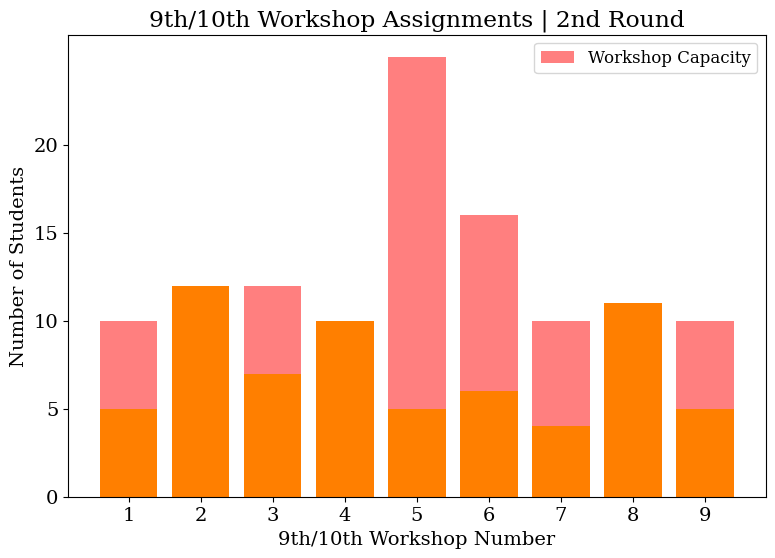

In [74]:
plt.bar(range(len(second_round_ninth_tenth_workshops_counts)), second_round_ninth_tenth_workshops_counts, color='yellow')
plt.bar(range(len(ninth_tenth_capacities)), ninth_tenth_capacities, color='red', alpha = 0.5, label = 'Workshop Capacity')

plt.xticks(range(len(second_round_ninth_tenth_workshops_counts)), range(1, len(second_round_ninth_tenth_workshops_counts) + 1))
plt.yticks(range(0, 25, 5))

plt.xlabel('9th/10th Workshop Number')
plt.ylabel('Number of Students')

plt.title('9th/10th Workshop Assignments | 2nd Round')

plt.legend(fontsize = 12)

plt.savefig("second_round_ninth_tenth_workshops.png", dpi = 300)

plt.show()

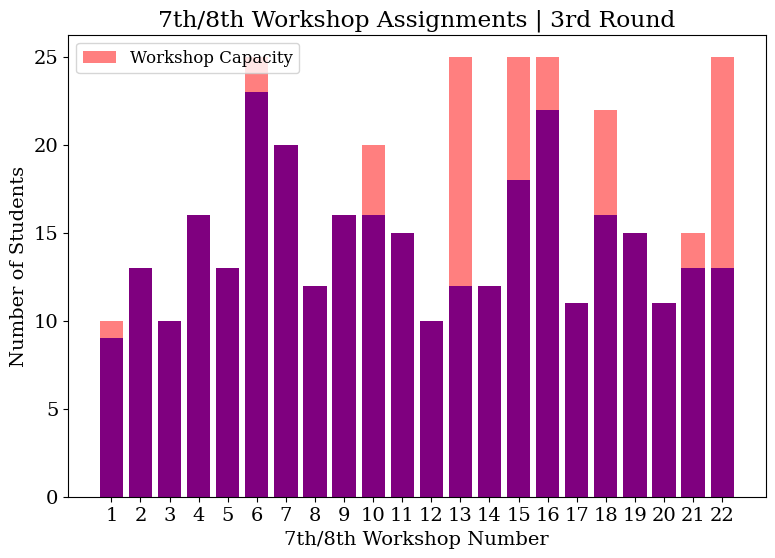

In [75]:
plt.bar(range(len(third_round_seventh_eight_workshops_counts)), third_round_seventh_eight_workshops_counts, color='blue')
plt.bar(range(len(seventh_eighth_capacities)), seventh_eighth_capacities, color='red', alpha = 0.5, label = 'Workshop Capacity')

plt.xticks(range(len(third_round_seventh_eight_workshops_counts)), range(1, len(third_round_seventh_eight_workshops_counts) + 1))
plt.yticks(range(0, 30, 5))

plt.xlabel('7th/8th Workshop Number')
plt.ylabel('Number of Students')

plt.title('7th/8th Workshop Assignments | 3rd Round')

plt.legend(fontsize = 12)

plt.savefig("third_round_seventh_eight_workshops.png", dpi = 300)

plt.show()